In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
import scipy.stats
import torch
# from IPython.display import Image
from PIL import Image

In [14]:
font = {
#     'family' : 'Arial',
#     'family': 'Times New Roman',
    'family': 'DejaVu Sans',
    'weight' : 'normal',
    'size'   : 14
}

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
mpl.rc('font', **font)

dpi = 100

In [723]:
def loadobj(k):
    return torch.load('./figure_objects/%s.pt' % k)

## ResNet50 filters

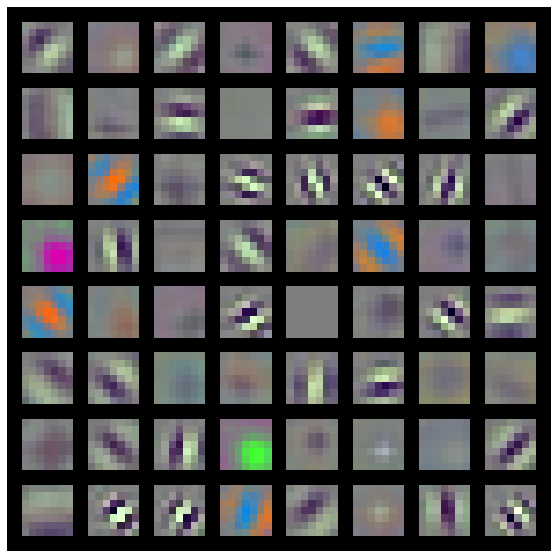

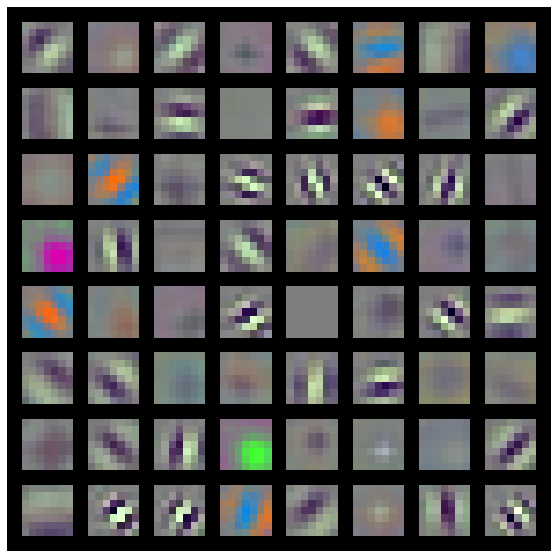

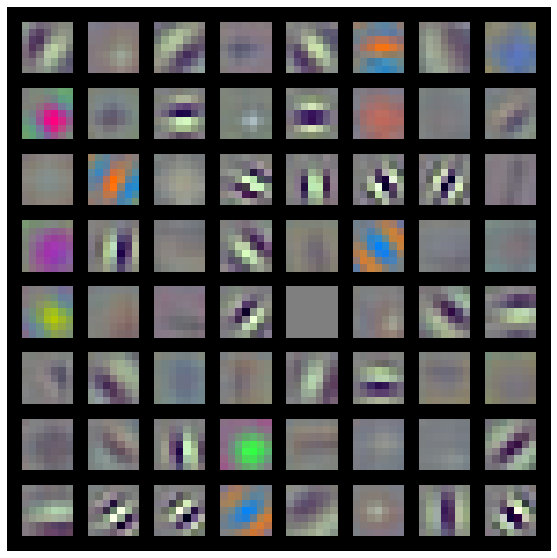

In [835]:
obj = loadobj('resnet50_filters')

import torchvision
def viz(w):
    w = w.detach().cpu()
    w = (w + 0.5) / 1.0
    w = w.clip(0, 1)
    
    if len(w.shape) == 3:
        w = w.unsqueeze(0)
    if w.shape[0] > 1:
        w = torchvision.utils.make_grid(w)
    else:
        w = w.squeeze(0)
    w = w.permute(1, 2, 0)
    plt.figure(figsize=(10, 10))
    plt.imshow(w)
    plt.axis('off')
    plt.show()
viz(obj['v1'])
viz(obj['v1'])
viz(obj['v2_perm1'])

## 10-class Dataset comparisons

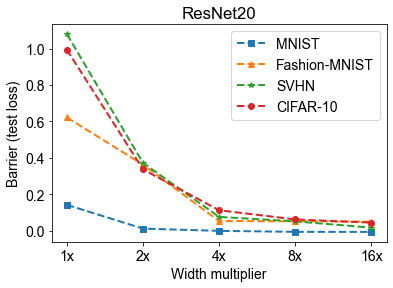

In [807]:
# loss barriers

ww = [1, 2, 4, 8, 16]
ii = 3

def func(d):
    return (d['permute_renorm'][ii] - (d['model_v1'][ii]+d['model_v2'][ii])/2)

metrics = loadobj('batchnorm_resnet20_barriers')
bb = [func(d) for d in [metrics['resnet20x%d' % i] for i in ww]]
bb1 = np.array(bb)
metrics = loadobj('mnist_resnet20_barriers')
bb = [func(d) for d in [metrics['resnet20x%d' % i] for i in ww]]
bb2 = np.array(bb)
metrics = loadobj('fashionmnist_resnet20_barriers')
bb = [func(d) for d in [metrics['resnet20x%d' % i] for i in ww]]
bb3 = np.array(bb)
metrics = loadobj('svhn_resnet20_barriers')
bb = [func(d) for d in [metrics['resnet20x%d' % i] for i in ww]]
bb4 = np.array(bb)

plt.figure(figsize=(6, 4))
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = "14"

kwargs = {'linewidth': 2, 'linestyle': '--'}
plt.plot(bb2, label='MNIST', marker='s', **kwargs)
plt.plot(bb3, label='Fashion-MNIST', marker='^', **kwargs)
plt.plot(bb4, label='SVHN', marker='*', **kwargs)
plt.plot(bb1, label='CIFAR-10', marker='o', **kwargs)

# plt.ylim([0, 1.0])
# plt.ylim([0, 30])
xx = [0, 1, 2, 3, 4]
plt.xticks(xx, ['%dx' % 2**x for x in xx])
plt.legend()
# plt.title('ResNet20 on CIFAR-10')
plt.xlabel('Width multiplier')
plt.ylabel('Barrier (test loss)')
plt.title('ResNet20')
plt.show()

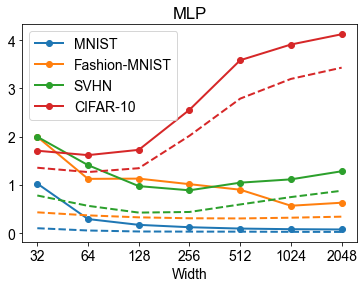

In [830]:
stats = loadobj('mlp_barriers_datasets')

ii = 3
ccs = {}
for dset in ['mnist', 'fashionmnist', 'svhn', 'cifar10']:
    cc0 = []
    cc3 = []
    for h in [32, 64, 128, 256, 512, 1024, 2048]:
        c = stats['%s_e100_l10_h%d' % (dset, h)]
        c0 = (c['v1'][ii] + c['v2'][ii])/2
        c3 = c['permute_correct'][ii]
        cc0.append(c0)
        cc3.append(c3)
    ccs[dset] = (cc0, cc3)

dset_map = {'mnist': 'MNIST', 'fashionmnist': 'Fashion-MNIST', 'svhn': 'SVHN', 'cifar10': 'CIFAR-10'}
for i, (k, (cc0, cc3)) in enumerate(ccs.items()):
    plt.plot(cc3, label=dset_map[k], linewidth=2, marker='o', color=colors[i])
    plt.plot(cc0, linewidth=2, linestyle='--', color=colors[i])
plt.legend()
plt.title('MLP')

xx = [0, 1, 2, 3, 4, 5, 6]
plt.xticks(xx, ['%d' % (32*2**x) for x in xx])
plt.xlabel('Width')

# plt.ylim([0, 100])

plt.show()

## CIFAR-100

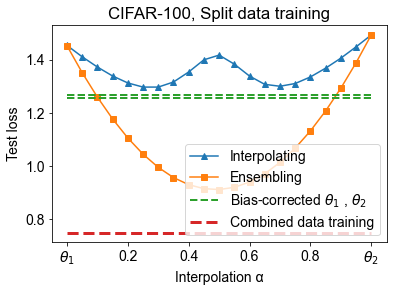

In [725]:
obj = loadobj('cifar100_split')

yy1 = obj['interpolate']
yy2 = obj['ensemble']
yy3 = obj['adjusted_v1a']
yy4 = obj['adjusted_v1b']

ii = 3
agg_fn = min
yy0a = [y[ii] for y in yy3]
yy0b = [y[ii] for y in yy4]
yy0c = obj['full'][ii]

xx = np.arange(0, 1.0001, 1/(len(yy1)-1))
plt.plot(xx, [y[ii] for y in yy1], label='Interpolating',
         marker='^', color=colors[0])
plt.plot(xx, [y[ii] for y in yy2], label='Ensembling',
         marker='s', color=colors[1])
plt.plot(xx, [agg_fn(yy0a)]*len(xx), label='Bias-corrected $\\theta_1$ , $\\theta_2$',
         linewidth=2, linestyle='--', color=colors[2])
plt.plot(xx, [agg_fn(yy0b)]*len(xx),
         linewidth=2, linestyle='--', color=colors[2])
plt.plot(xx, [yy0c]*len(xx), label='Combined data training',
         linewidth=3, linestyle='--', color=colors[3])
plt.title('CIFAR-100, Split data training')
plt.xlabel('Test loss')
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['$\\theta_1$', '0.2', '0.4', '0.6', '0.8', '$\\theta_2$'])
plt.xlabel('Interpolation α')

# plt.ylim([0.68, 1.55])
# plt.ylim([0.4, 1.5])
plt.ylabel('Test loss')
plt.legend(loc='lower right')

plt.show()

## ResNet20 on CIFAR-10

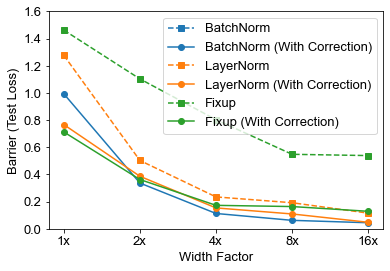

In [726]:
# loss barriers

ww = [1, 2, 4, 8, 16]
ii = 3
def func(d):
    return (d['permute_renorm'][ii] - (d['model_v1'][ii]+d['model_v2'][ii])/2)
metrics = loadobj('batchnorm_resnet20_barriers')
bb = [func(d) for d in [metrics['resnet20x%d' % i] for i in ww]]
bb1 = np.array(bb)
metrics = loadobj('layernorm_resnet20_e250_barriers')
bb = [func(d) for d in [metrics['layernorm_resnet20x%d' % i] for i in ww]]
bb2 = np.array(bb)
metrics = loadobj('fixup_resnet20_barriers')
bb = [func(d) for d in [metrics['fixup_resnet20x%d' % i] for i in ww]]
bb3 = np.array(bb)

def func(d):
    return (d['permute'][ii] - (d['model_v1'][ii]+d['model_v2'][ii])/2)
metrics = loadobj('batchnorm_resnet20_barriers')
bb = [func(d) for d in [metrics['resnet20x%d' % i] for i in ww]]
bb1b = np.array(bb)
metrics = loadobj('layernorm_resnet20_e250_barriers')
bb = [func(d) for d in [metrics['layernorm_resnet20x%d' % i] for i in ww]]
bb2b = np.array(bb)
metrics = loadobj('fixup_resnet20_barriers')
bb = [func(d) for d in [metrics['fixup_resnet20x%d' % i] for i in ww]]
bb3b = np.array(bb)


plt.figure(figsize=(6, 4))
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = "13"

i = 0
plt.plot(bb1b, label='BatchNorm', color=colors[i], marker='s', linestyle='dashed')
plt.plot(bb1, label='BatchNorm (With Correction)', color=colors[i], marker='o', linestyle='solid')
i += 1
plt.plot(bb2b, label='LayerNorm', color=colors[i], marker='s', linestyle='dashed')
plt.plot(bb2, label='LayerNorm (With Correction)', color=colors[i], marker='o', linestyle='solid')
i += 1
plt.plot(bb3b, label='Fixup', color=colors[i], marker='s', linestyle='dashed')
plt.plot(bb3, label='Fixup (With Correction)', color=colors[i], marker='o', linestyle='solid')

plt.ylim([0, 1.6])
# plt.ylim([0, 10])
xx = [0, 1, 2, 3, 4]
plt.xticks(xx, ['%dx' % 2**x for x in xx])
plt.legend()
# plt.title('ResNet20 on CIFAR-10')
plt.xlabel('Width Factor')
plt.ylabel('Barrier (Test Loss)')
plt.show()

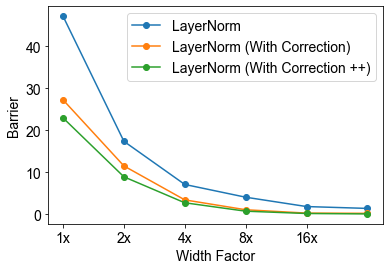

In [727]:
# loss barriers

ww = [1, 2, 4, 8, 16, 32]
ii = 0

def func(d):
    return -(d['permute'][ii] - (d['model_v1'][ii]+d['model_v2'][ii])/2)
metrics = loadobj('layernorm_resnet20_e250_barriers')
bb = [func(d) for d in [metrics['layernorm_resnet20x%d' % i] for i in ww]]
bb1 = np.array(bb)

def func(d):
    return -(d['permute_renorm'][ii] - (d['model_v1'][ii]+d['model_v2'][ii])/2)
metrics = loadobj('layernorm_resnet20_e250_barriers')
bb = [func(d) for d in [metrics['layernorm_resnet20x%d' % i] for i in ww]]
bb2 = np.array(bb)
metrics = loadobj('layernorm_resnet20_e250_barriers_morecorrect')
bb = [func(d) for d in [metrics['layernorm_resnet20x%d' % i] for i in ww]]
bb3 = np.array(bb)


plt.figure(figsize=(6, 4))
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = "14"

i = 0
plt.plot(bb1, label='LayerNorm', color=colors[i], marker='o', linestyle='solid')
i += 1
plt.plot(bb2, label='LayerNorm (With Correction)', color=colors[i], marker='o', linestyle='solid')
i += 1
plt.plot(bb3, label='LayerNorm (With Correction ++)', color=colors[i], marker='o', linestyle='solid')

# plt.ylim([0, 1.0])
# plt.ylim([0, 30])
xx = [0, 1, 2, 3, 4]
plt.xticks(xx, ['%dx' % 2**x for x in xx])
plt.legend()
# plt.title('ResNet20 on CIFAR-10')
plt.xlabel('Width Factor')
plt.ylabel('Barrier')
plt.show()

## ResNet18

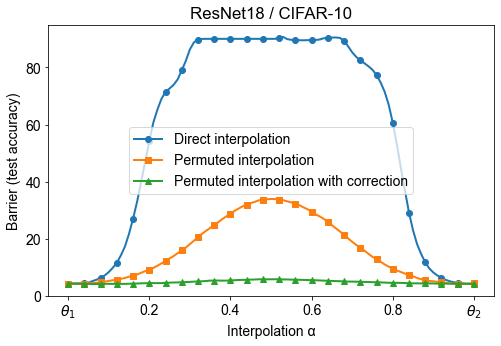

In [761]:
## resnet18 barrier curves
metrics = loadobj('resnet18_interp')

## test acc curve
cc1 = [m[2] for m in metrics['resnet18']]
cc2 = [m[2] for m in metrics['resnet18_permute']]
cc3 = [m[2] for m in metrics['resnet18_permute_renorm']]
cc1, cc2, cc3 = map(np.array, [cc1, cc2, cc3])
# base = (cc1[0]+cc1[-1])/2
# cc1, cc2, cc3 = map(lambda c: base - c, [cc1, cc2, cc3])
cc1, cc2, cc3 = map(lambda c: 100 - c, [cc1, cc2, cc3])

fig = plt.figure(figsize=(8, 5))
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = "14"
plt.title('ResNet18 / CIFAR-10')

xx = torch.arange(0, 1.0001, 0.01)
ls = 'solid'
plt.plot(xx, cc1, label='Direct interpolation',
         linewidth=2, marker='o', markevery=4)
plt.plot(xx, cc2, label='Permuted interpolation',
         linewidth=2, marker='s', markevery=4)
plt.plot(xx, cc3, label='Permuted interpolation with correction',
         linewidth=2, marker='^', markevery=4)

plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['$\\theta_1$', '0.2', '0.4', '0.6', '0.8', '$\\theta_2$'])
plt.xlabel('Interpolation α')

plt.ylabel('Barrier (test accuracy)')
# plt.ylim([5, 100])
# plt.xlim([-0.05, 1.05])
plt.legend(loc='center', framealpha=0.75)

plt.show()

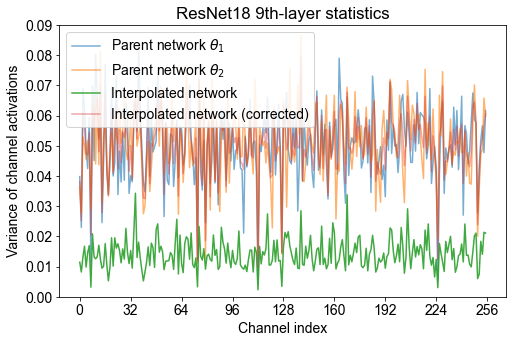

In [767]:
obj = loadobj('resnet_stats')
vv0 = obj['parentA']
vv1 = obj['parentB']
vva = obj['interp']
vvb = obj['correct']

fig = plt.figure(figsize=(8, 5))
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = "14"
plt.plot(vv0, label='Parent network $\\theta_1$', alpha=0.6)
plt.plot(vv1, label='Parent network $\\theta_2$', alpha=0.6)
plt.plot(vva, label='Interpolated network', alpha=0.9)
plt.plot(vvb, label='Interpolated network (corrected)', alpha=0.4)
plt.xlabel('Channel index')
plt.ylabel('Variance of channel activations')
plt.title('ResNet18 9th-layer statistics')
plt.ylim([0.0, 0.09])
# plt.ylim([0.0, 0.1])
plt.legend(framealpha=0.85)
plt.xticks(range(0, 256+1, 32), range(0, 256+1, 32))

plt.savefig('./figures/resnet18_stats.png', dpi=dpi)
plt.show()

# ImageNet

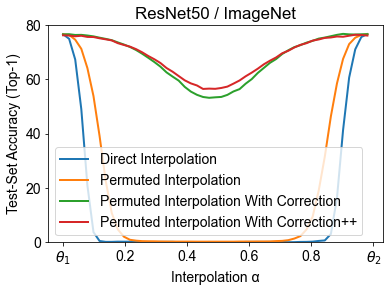

In [733]:
stats = loadobj('resnet50j_imagenet_barrier50pp')

cc1 = [b[2] for b in stats['vanilla']]
cc2 = [b[2] for b in stats['permute']]
cc3 = [b[2] for b in stats['permute_renorm']]
cc4 = [b[2] for b in stats['permute_renorm_plus']]
xx = np.arange(0, 1, 1/len(cc1))

plt.figure(figsize=(6, 4))
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = "14"
plt.plot(xx, cc1, label='Direct Interpolation', linewidth=2)
plt.plot(xx, cc2, label='Permuted Interpolation', linewidth=2)
plt.plot(xx, cc3, label='Permuted Interpolation With Correction', linewidth=2)
plt.plot(xx, cc4, label='Permuted Interpolation With Correction++', linewidth=2)

# for k in stats.keys():
#     cc = [b[2] for b in stats[k]]
#     xx = np.arange(0, 1, 1/len(cc))
#     plt.plot(xx, cc, label=k, linewidth=2, marker='o')
# plt.legend()

# plt.ylim([-1, 90])
plt.ylim(0, 80)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['$\\theta_1$', '0.2', '0.4', '0.6', '0.8', '$\\theta_2$'])
plt.xlabel('Interpolation α')
plt.ylabel('Test-Set Accuracy (Top-1)')
plt.title('ResNet50 / ImageNet')
plt.legend()

plt.savefig('./figures/imagenet_resnet50.png', dpi=dpi)
plt.show()

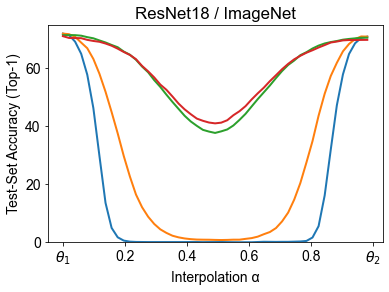

In [420]:
stats = torch.load('resnet18j_imagenet_barrier50pp.pt')

cc1 = [b[2] for b in stats['vanilla']]
cc2 = [b[2] for b in stats['permute']]
cc3 = [b[2] for b in stats['permute_renorm']]
cc4 = [b[2] for b in stats['permute_renorm_plus']]
xx = np.arange(0, 1, 1/len(cc1))

plt.figure(figsize=(6, 4))
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = "14"
plt.plot(xx, cc1, label='Direct Interpolation', linewidth=2)
plt.plot(xx, cc2, label='Permuted Interpolation', linewidth=2)
plt.plot(xx, cc3, label='Permuted Interpolation With Correction', linewidth=2)
plt.plot(xx, cc4, label='Permuted Interpolation With Correction++', linewidth=2)

# for k in stats.keys():
#     cc = [b[2] for b in stats[k]]
#     xx = np.arange(0, 1, 1/len(cc))
#     plt.plot(xx, cc, label=k, linewidth=2, marker='o')
# plt.legend()

# plt.ylim([-1, 90])
plt.ylim(0, 75)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['$\\theta_1$', '0.2', '0.4', '0.6', '0.8', '$\\theta_2$'])
plt.xlabel('Interpolation α')
plt.ylabel('Test-Set Accuracy (Top-1)')
plt.title('ResNet18 / ImageNet')

# plt.savefig('./figures/imagenet_resnet50.png', dpi=dpi)
plt.show()

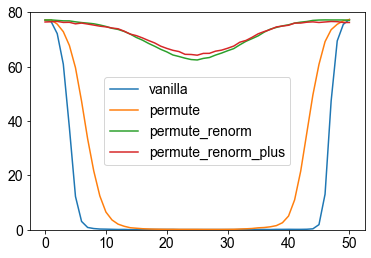

In [458]:
p = 'resnet50x2_imagenet_barriers.pt'
stats = torch.load(p)

for k in stats.keys():
    cc = [b[2] for b in stats[k]]
    plt.plot(cc, label=k)
plt.legend()
plt.ylim([0, 80])
plt.show()

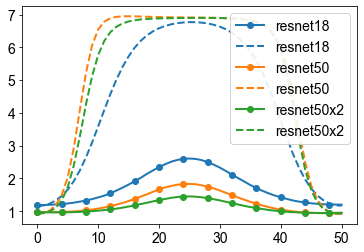

In [734]:
stats = loadobj('resnet18j_imagenet_barrier50pp')
cc = [b[3] for b in stats['permute_renorm_plus']]
plt.plot(cc, label='resnet18', linewidth=2, color=colors[0], marker='o', markevery=4)
cc = [b[3] for b in stats['permute']]
plt.plot(cc, label='resnet18', linewidth=2, color=colors[0], linestyle='--')

stats = loadobj('resnet50j_imagenet_barrier50pp')
cc = [b[3] for b in stats['permute_renorm_plus']]
plt.plot(cc, label='resnet50', linewidth=2, color=colors[1], marker='o', markevery=4)
cc = [b[3] for b in stats['permute']]
plt.plot(cc, label='resnet50', linewidth=2, color=colors[1], linestyle='--')

stats = loadobj('resnet50x2_imagenet_barriers')
cc = [b[3] for b in stats['permute_renorm_plus']]
plt.plot(cc, label='resnet50x2', linewidth=2, color=colors[2], marker='o', markevery=4)
cc = [b[3] for b in stats['permute']]
plt.plot(cc, label='resnet50x2', linewidth=2, color=colors[2], linestyle='--')

plt.legend(loc='upper right', framealpha=0.9)
# plt.ylim([0, 80])
plt.show()

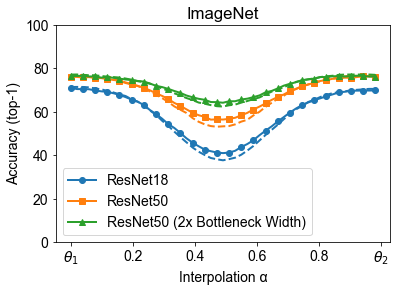

In [735]:
ii = 2

xx = np.arange(0, 1, 1/len(cc1))

stats = loadobj('resnet18j_imagenet_barrier50pp')
cc = [b[ii] for b in stats['permute_renorm_plus']]
plt.plot(xx, cc, label='ResNet18', linewidth=2, color=colors[0], marker='o', markevery=2)
cc = [b[ii] for b in stats['permute_renorm']]
plt.plot(xx, cc, linewidth=2, color=colors[0], linestyle='--')

stats = loadobj('resnet50j_imagenet_barrier50pp')
cc = [b[ii] for b in stats['permute_renorm_plus']]
plt.plot(xx, cc, label='ResNet50', linewidth=2, color=colors[1], marker='s', markevery=2)
cc = [b[ii] for b in stats['permute_renorm']]
plt.plot(xx, cc, linewidth=2, color=colors[1], linestyle='--')

stats = loadobj('resnet50x2_imagenet_barriers')
cc = [b[ii] for b in stats['permute_renorm_plus']]
plt.plot(xx, cc, label='ResNet50 (2x Bottleneck Width)', linewidth=2, color=colors[2], marker='^', markevery=2)
cc = [b[ii] for b in stats['permute_renorm']]
plt.plot(xx, cc, linewidth=2, color=colors[2], linestyle='--')

# plt.legend(loc='upper right', framealpha=0.9)
plt.legend()

plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['$\\theta_1$', '0.2', '0.4', '0.6', '0.8', '$\\theta_2$'])
plt.xlabel('Interpolation α')
plt.title('ImageNet')
plt.ylabel('Accuracy (top-1)')
plt.ylim([0, 100])

# plt.savefig('./figures/imagenet_3resnets.png', dpi=dpi)
plt.show()

0.9282174420644185
0.9757373011035155


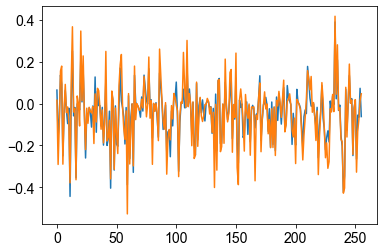

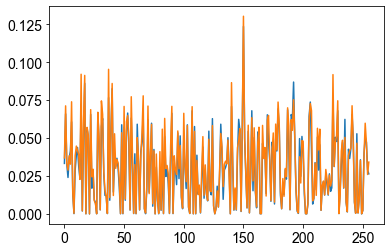

In [736]:
obj = loadobj('resnet50x2_forward_closed_stats')

ii = 10
forward_mean = obj['forward_means'][ii]
forward_var = obj['forward_vars'][ii]
closed_mean = obj['closed_means'][ii]
closed_var = obj['closed_vars'][ii]

print(scipy.stats.pearsonr(forward_mean.tolist(), closed_mean.tolist())[0])
print(scipy.stats.pearsonr(forward_var.tolist(), closed_var.tolist())[0])
plt.plot(forward_mean.tolist())
plt.plot(closed_mean.tolist())
plt.show()

plt.plot(forward_var.tolist())
plt.plot(closed_var.tolist())
plt.show()

## MNIST MLP

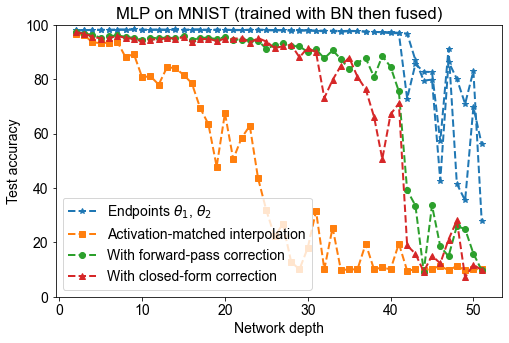

In [742]:
obj = loadobj('mlp_barriers_layers1to50')

stats = obj

plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = "14"
plt.figure(figsize=(8, 5))

ii = 2
yy0a = [s['v1'][ii] for s in stats.values()]
yy0b = [s['v2'][ii] for s in stats.values()]
yy0 = (np.array(yy0a) + np.array(yy0b)) / 2
yy1 = [s['permute'][ii] for s in stats.values()]
yy2 = [s['permute_correct'][ii] for s in stats.values()]
yy3 = [s['permute_correct_formula'][ii] for s in stats.values()]
xx = np.arange(2, 2+len(yy0))
plt.plot(xx, yy0a, label='Endpoints $\\theta_1$, $\\theta_2$',
         linewidth=2, linestyle='--', marker='*', color=colors[0])
plt.plot(xx, yy0b,
         linewidth=2, linestyle='--', marker='*', color=colors[0])

plt.plot(xx, yy1, label='Activation-matched interpolation',
         linewidth=2, linestyle='--', marker='s', color=colors[1])
plt.plot(xx, yy2, label='With forward-pass correction', linewidth=2,
         linestyle='--', marker='o', color=colors[2])
plt.plot(xx, yy3, label='With closed-form correction',
         linewidth=2, linestyle='--', marker='^', color=colors[3])
plt.ylim([0, 100])
# plt.ylim([90, 100])
plt.xlabel('Network depth')
plt.title('MLP on MNIST (trained with BN then fused)')
plt.legend()
plt.ylabel('Test accuracy')

# plt.xlim([2, 51])

plt.savefig('./figures/mlp_50layer.png', bbox_inches='tight', dpi=dpi)
plt.show()

## Variance per layer

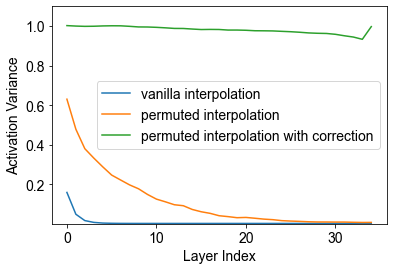

In [743]:
obj = loadobj('layerwise_var_mlp_e50_l35_h128')

vv0 = obj['v1']
vv1 = obj['v2']
vvb = obj['vanilla']
vvc = obj['permuted']
vvd = obj['permuted_renorm']

vv01 = (np.array(vv0) + np.array(vv1))/2
# plt.plot(vv01, label='endpoints')
plt.plot(vvb, label='vanilla interpolation')
plt.plot(vvc, label='permuted interpolation')
plt.plot(vvd, label='permuted interpolation with correction')

plt.legend()

# plt.yscale('log')
plt.ylim([1e-7, 1.1])
plt.ylabel('Activation Variance')
plt.xlabel('Layer Index')
plt.show()

In [744]:
# obj = torch.load('var_ratios_vgg16_v1_v2.pt')

# rr1 = obj['var_ratio_vanilla']
# rr2 = obj['var_ratio_permute']


# plt.plot(rr1, linewidth=2, marker='o', label='Vanilla interpolation')
# plt.plot(rr2, linewidth=2, marker='o', label='Permuted interpolation')
# # plt.yscale('log')
# plt.xticks(range(len(rr1)), range(1, len(rr1)+1))
# plt.xlabel('Layer index')
# plt.ylabel('Variance ratio')
# # plt.title('MNIST 10-layer MLP')
# plt.title('CIFAR-10 VGG16')
# # plt.ylim([1e-7, 1])
# # plt.ylim([2e-5, 1])
# plt.ylim([0, 1])
# plt.legend()
# # plt.show()
# plt.savefig('./figs/fig101.png')
# pass
# Image.open('./figs/fig101.png')

## VGG CIFAR-10

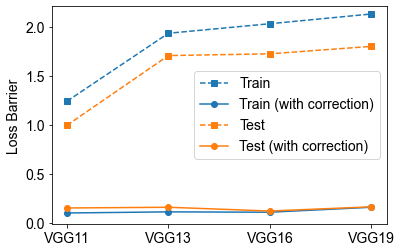

In [836]:
metrics = loadobj('vgg_barriers')

bbs = []
for ii in [1, 3]:
# for ii in [0, 2]:
    cc1 = []
    cc2 = []
    for d in [11, 13, 16, 19]:
        mm = metrics['vgg%d' % d]
        c0 = (mm['model_v1'][ii] + mm['model_v2'][ii])/2
        c1 = mm['permute'][ii]
        c2 = mm['permute_renorm'][ii]
        cc1.append(c1-c0)
        cc2.append(c2-c0)
    bbs.append(cc1)
    bbs.append(cc2)

plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = "14"
fig = plt.figure(figsize=(6, 4))
    
plt.plot(bbs[0], linestyle='dashed', marker='s', label='Train', color=colors[0])
plt.plot(bbs[1], linestyle='solid', marker='o', label='Train (with correction)')
plt.plot(bbs[2], linestyle='dashed', marker='s', label='Test', color=colors[1])
plt.plot(bbs[3], linestyle='solid', marker='o', label='Test (with correction)')

plt.ylim([-0.01, 2.21])
plt.xticks([0, 1, 2, 3], ['VGG11', 'VGG13', 'VGG16', 'VGG19'])
plt.ylabel('Loss Barrier')
plt.legend()

# fig.tight_layout()
plt.savefig('./figures/vgg_cifar_loss_barrier.png', dpi=dpi)
plt.show()

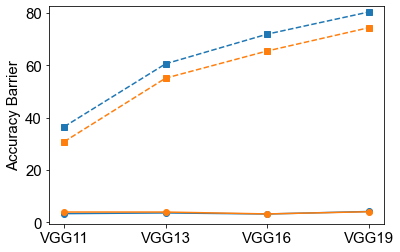

In [837]:
metrics = loadobj('vgg_barriers')

bbs = []
for ii in [0, 2]:
    cc1 = []
    cc2 = []
    for d in [11, 13, 16, 19]:
        mm = metrics['vgg%d' % d]
        c0 = (mm['model_v1'][ii] + mm['model_v2'][ii])/2
        c1 = mm['permute'][ii]
        c2 = mm['permute_renorm'][ii]
        cc1.append(c0-c1)
        cc2.append(c0-c2)
    bbs.append(cc1)
    bbs.append(cc2)

plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = "15"
fig = plt.figure(figsize=(6, 4))

plt.plot(bbs[0], linestyle='dashed', marker='s', label='Train', color=colors[0])
plt.plot(bbs[1], linestyle='solid', marker='o', label='Train (with correction)')
plt.plot(bbs[2], linestyle='dashed', marker='s', label='Test', color=colors[1])
plt.plot(bbs[3], linestyle='solid', marker='o', label='Test (with correction)')

plt.ylim([-0.5, 82.5])
plt.xticks([0, 1, 2, 3], ['VGG11', 'VGG13', 'VGG16', 'VGG19'])
plt.ylabel('Accuracy Barrier')

plt.savefig('./figures/vgg_cifar_acc_barrier.png', dpi=dpi)
plt.show()

## all accuracies vs test barrier

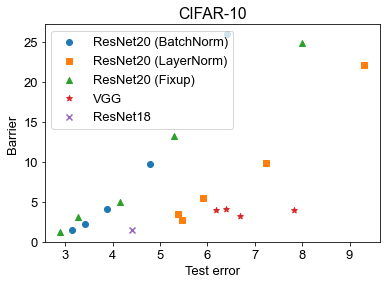

In [741]:
## resnet20 batchnorm

ii = 2

metrics = loadobj('batchnorm_resnet20_barriers')
xx1 = []
yy1 = []
for w in [1, 2, 4, 8, 16]:
    mm = metrics['resnet20x%d' % w]
    c0 = (mm['model_v1'][ii] + mm['model_v2'][ii])/2

    c1 = mm['permute'][ii]
    c2 = mm['permute_renorm'][ii]
    xx1.append(100 - c0)
    yy1.append(c0 - c2)

metrics = loadobj('layernorm_resnet20_barriers')
xx2 = []
yy2 = []
for w in [1, 2, 4, 8, 16]:
    mm = metrics['layernorm_resnet20x%d' % w]
    c0 = (mm['model_v1'][ii] + mm['model_v2'][ii])/2

    c1 = mm['permute'][ii]
    c2 = mm['permute_renorm'][ii]
    xx2.append(100 - c0)
    yy2.append(c0 - c2)

metrics = loadobj('fixup_resnet20_barriers')
xx3 = []
yy3 = []
for w in [1, 2, 4, 8, 16]:
    mm = metrics['fixup_resnet20x%d' % w]
    c0 = (mm['model_v1'][ii] + mm['model_v2'][ii])/2

    c1 = mm['permute'][ii]
    c2 = mm['permute_renorm'][ii]
    xx3.append(100 - c0)
    yy3.append(c0 - c2)
    
metrics = loadobj('vgg_barriers')
xx4 = []
yy4 = []
for d in [11, 13, 16, 19]:
    mm = metrics['vgg%d' % d]
    c0 = (mm['model_v1'][ii] + mm['model_v2'][ii])/2

    c1 = mm['permute'][ii]
    c2 = mm['permute_renorm'][ii]
    xx4.append(100 - c0)
    yy4.append(c0 - c2)
    
    
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = "13"
fig = plt.figure(figsize=(6, 4))

plt.scatter(xx1, yy1, marker='o', label='ResNet20 (BatchNorm)')
plt.scatter(xx2, yy2, marker='s', label='ResNet20 (LayerNorm)')
plt.scatter(xx3, yy3, marker='^', label='ResNet20 (Fixup)')
plt.scatter(xx4, yy4, marker='*', label='VGG')
# plt.scatter([95.6], [1.5], marker='x', label='ResNet18')
plt.scatter([100-95.6], [1.5], marker='x', label='ResNet18')
plt.title('CIFAR-10')
plt.xlabel('Test error')
plt.ylabel('Barrier')
plt.legend()

plt.savefig('./figures/acc_vs_barrier.png', dpi=dpi)
plt.show()

### archive

In [36]:
# ## data
# # h=512, layers=2, norm=None
# # stats1 = torch.load('mlp_e50_h512_v5_v6.pt')
# # stats2 = torch.load('mlp_e50_h512_v3_v4.pt')
# # stats3 = torch.load('mlp_e50_h512_v7_v8.pt')
# # stats4 = torch.load('mlp_e50_h512_v7_v8_b.pt')

# # stats5 = torch.load('mlp_e50_h128_v1_v2.pt')
# # stats6 = torch.load('mlp_e50_h128_v3_v4.pt')

# # stats0 = torch.load('mlp_e50_h64_v3_v4.pt')
# # stats0 = torch.load('mlp_e50_h64_v5_v6.pt')
# # stats0 = torch.load('mlp_e50_h128_v5_v6.pt')
# # stats0 = torch.load('mlp_e50_h128_v3_v4.pt')

# # stats0 = torch.load('mlp_e50_h128_v10_v11.pt')
# # stats0 = torch.load('mlp_e50_h128_v12_v13.pt')

# stats1 = torch.load('mlp_e50_h128_v12_v13.pt')
# stats2 = torch.load('mlp_e50_h128_v14_v15.pt')
# stats3 = torch.load('mlp_e50_h128_v16_v17.pt')

In [35]:
# # i = 0
# # cc0 = [(v['model_v1'][i] + v['model_v2'][i])/2 for v in stats.values()]
# # cc1 = [v['vanilla'][i] for v in stats.values()]
# # cc2 = [v['permute'][i] for v in stats.values()]
# # cc3 = [v['renorm'][i] for v in stats.values()]
# # cc4 = [v['permute_renorm'][i] for v in stats.values()]

# # def f(cc):
# #     cc = np.array(cc)
# #     cc = np.array(cc0) - cc
# #     if cc.mean() < 0:
# #         cc = -cc
# #     cc = cc[:8]
# #     cc = cc / 100
# #     return cc

# def thing(k, i):
#     ccs = []
#     for stats in [stats1, stats2, stats3]:
# #     for stats in [stats0]:

#         cc0 = [(v['model_v1'][i] + v['model_v2'][i])/2 for v in stats.values()]
#         cc1 = [v[k][i] for v in stats.values()]
#         cc0 = np.array(cc0)
#         cc1 = np.array(cc1)
#         cc = cc0 - cc1
#         if cc.mean() < 0:
#             cc = -cc
# #         cc = np.clip(cc, 0, 10000) + 1e-5
# #         cc = cc[:8]
# #         if cc.max() > 10:
# #             cc = cc / 100
#         cc = cc / 100
#         cc = cc[:8]
#         ccs.append(cc)
#     cc = np.stack(ccs)
#     cc_min = cc.min(0)
#     cc_max = cc.max(0)
#     cc_med = cc.mean(0)
#     return cc_min, cc_med, cc_max
# #     return ccs[0], ccs[1], ccs[2]

In [33]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# # plt.figure(figsize=(7, 4))
# # ax.plot(cc_f(cc1), linewidth=2, label='vanilla')
# # ax.plot(cc_f(cc2), linewidth=2, label='permute')
# # ax.plot(cc_f(cc3), linewidth=2, label='renorm')
# # ax.plot(cc_f(cc4), linewidth=2, label='permute_renorm')

# for k in ['vanilla', 'permute', 'renorm', 'permute_renorm']:
# # k = 'permute'
#     cc0, cc1, cc2 = thing(k, 2)
#     xx = range(len(cc0))
#     ax.fill_between(xx, cc0, cc2, alpha=0.3)
#     plt.plot(cc1, linewidth=2, label=k)
# # plt.plot(cc0)
# # plt.plot(cc1)
# # plt.plot(cc2)
# # ax.fill_between(xx, f(cc1), f(cc2), alpha=0.5, color=colors[0])

# # plt.ylim([0, 110])
# # plt.ylim([90, 100])
# # plt.ylim([0, 10])
# # plt.ylim([0, 0.1])
# plt.xticks(range(len(xx)), range(1, len(xx)+1))
# plt.title('MLP on MNIST')
# plt.xlabel('Number of hidden layers')
# plt.ylabel('Barrier (test accuracy)')
# # plt.yscale('log')
# plt.legend()

# plt.savefig('./figs/fig101.png')
# pass
# Image.open('./figs/fig101.png')

In [34]:
# fig = plt.figure()
# ax = fig.add_subplot(111)

# ld = {
#     'vanilla': 'Direct interpolation',
#     'permute': 'Permuted interpolation'
# }

# for k in ['vanilla', 'permute']:
# # k = 'permute'
#     cc0, cc1, cc2 = thing(k, 2)
#     xx = range(len(cc0))
#     ax.fill_between(xx, cc0, cc2, alpha=0.3)
#     plt.plot(cc1, linewidth=2, label=ld[k])
# # plt.plot(cc0)
# # plt.plot(cc1)
# # plt.plot(cc2)
# # ax.fill_between(xx, f(cc1), f(cc2), alpha=0.5, color=colors[0])

# plt.ylim([-0.02, 1.02])
# plt.xticks(range(len(xx)), range(1, len(xx)+1))
# plt.title('MLPs on MNIST')
# plt.xlabel('Number of hidden layers')
# plt.ylabel('Barrier (test accuracy)')
# # plt.yscale('log')
# plt.legend()

# plt.savefig('./figs/fig101.png')
# pass
# Image.open('./figs/fig101.png')